# トランズモン物理入門

## 目次

1. [多準位量子系による量子ビット](#mlqsaq)
2. [量子回路のハミルトニアン](#hoqc)
3. [ハミルトニアンの量子化](#qth)
4. [量子化トランズモン](#tqt)
5. [トランズモンと量子調和振動子の比較](#cottatqho)
6. [量子ビットのドライブと回転波近似](#qdatrwa)

## 1. 多準位量子系による量子ビット <a id='mlqsaq'></a>

量子ビットを研究することは、二準位量子系の物理を知ることです。純粋な二準位系の例としては、電子のスピン（またはスピン$1/2$の素粒子）があります。そのスピンは上または下になり、それぞれを $|0\rangle$ と $|1\rangle$ にラベル付けします。歴史的に、$|0\rangle$ 状態をブロッホ球の"北極"にとるのは、磁場を$+\hat{z}$ 方向にかけた時の、低い方のエネルギー状態になるからです。

スピンとは異なる二準位系が、初期の超電導量子ビットとして発見されました。[クーパーペアボックス](https://arxiv.org/pdf/cond-mat/9904003v1.pdf)です。超電導に電気抵抗が無いのは、電子がクーパーペアを作るからです。クーパーペアは分解するためにエネルギーが必要で、（そしてそのエネルギーは低温では熱的に得られないため）効果的にお互いに引き付け合います。この状況は直感に反しています。電子は負に帯電しているため、本当は反発すべきです!　しかしながら多くの物質系で、全体的な効果の結果実現する相互作用があります。つまり正電荷格子の中の電子の影響で、電子が引き付け合うことが起こると考えることができます。クーパーペアボックスは超電導のアイランドでできており、余分な $2e$ のペア電荷を持っている($|0\rangle$)状態、または持っていない($|1\rangle$)状態になります。それらの状態はトンネル接合の電圧で操作することが可能であり、"ゲート"電圧で状態を逆にすることができます。そのため実質的に二準位系になります。 

電荷状態としてエンコードされた量子ビットはとりわけ *電荷ノイズ* に弱いです。クーパーペアボックスは事実そうですが、この点が研究者を苦しめます。ほとんどの量子システムは、原子のように、二準位系ではありません。天文学者が宇宙の組成を決めるのに使う特徴スペクトル線（エネルギー遷移）のように、原子は複数の準位を持っています。原子の基底状態と第一励起状態のように、２つの準位のみを分離しコントロールすることができて、はじめて量子ビットとみなすことができるのです。では他のタイプの超電導回路を量子ビットに使うのはどうでしょうか？ クーパーペアボックスの電荷ノイズに対する解決策は、量子ビットをより高次のエネルギーレベルで設計することです。すなわちこれが[トランズモン](https://arxiv.org/pdf/cond-mat/0703002.pdf)です。(transmon: *transmission-line shunted plasma oscillation* ) 非調和性を犠牲にして、電荷ノイズを抑えます。（非調和性: $|0\rangle \to |1\rangle$ と $|1\rangle \to |2\rangle$ の遷移周波数の違い。[高エネルギー状態へのアクセス](/course/quantum-hardware-pulses/accessing-higher-energy-states-with-qiskit-pulse)参照) ただし、量子ビットとしては基底状態と第一励起状態のみをとります。つまり量子状態は２つの超電導アイランド間のトンネル接合をクーパーペアが振動することによってエンコードされています。励起した $|1\rangle$ 状態は $|0\rangle$ の基底状態よりも高い周波数で振動します。

## 2. 量子回路のハミルトニアン <a id='hoqc'></a>

ハミルトニアンは系のポテンシャルエネルギーと運動エネルギーの合計に等しい関数です。これは古典力学ではまさにそのままですが、量子力学では変数を演算子に変換します。古典力学のポアソン括弧と量子力学の交換子を比べると、交換子が交換しないことがわかります。これはハイゼンベルグの不確定性原理により、同時に観測することができないことを意味しています。

ではまずはじめに線形 $LC$ 回路を考えます。$L$ をインダクタンス、$C$ をキャパシタンスとして、ハミルトニアンは運動エネルギー（電荷 $Q$ で表される）とポテンシャルエネルギー（流束 $\Phi$ で表される）の合計になります。
$$
\mathcal{H} = \frac{Q^2}{2C} + \frac{\Phi^2}{2L}
$$

<details>
    <summary>クリックで展開：線形回路のブランチーフラックス法</summary>

ハミルトニアンとラグランジュアンは大規模な物体のエネルギーを含む関数で、古典力学で歴史のあるものです。現在でも物体の"量子化"のためのテンプレートとなっており、それはトランズモンでも同じです。その方法はラグランジュアンを一般化座標で書き下すことです。大抵一般化座標には３次元空間の位置を使いますが、我々は（電圧の履歴で定義された）流束と呼ばれる量を使います。一般化座標の共役変数は算出され、我々のケースでは電荷になります。（たいていは運動量になります）ルジャンドル変換によって、ハミルトニアンは導出され、系のエネルギーの合計を与えます。回路のハミルトニアンは、ブランチーフラックス法でキャパシターとインダクターのエネルギーを考えることで見つかります。ブランチーフラックス法はそれ自身古典的なラグランジュアン力学をベースにしたものです。流束と電荷はそれぞれ電圧と電流を時間積分したものです。
$$
\Phi(t) = \int_{-\infty}^t V(t')\,dt' \quad {\rm and} \quad Q(t) = \int_{-\infty}^t I(t')\,dt' 
$$
一般化座標の流束を $\Phi$ とします。$V(t')$ と $I(t')$ は時刻 $t'$ においてトランズモンを流れる電圧と電流です。電気回路においては、電圧はポテンシャルエネルギー、電流は運動量のように働きます。時刻 $t$ における瞬間のエネルギーは次のようになります。
$$
E(t) = \int_{-\infty}^t V(t') I(t')\,dt'.
$$
（キャパシタンス $C$ の）キャパシターと（インダクタンス $L$ の）インダクターの間における電圧と電流は、それぞれ $V=L dI/dt$ と $I = C dV/dt$ の関係になります。回路の中で、キャパシターは電荷を貯め、インダクターは流束（電流）を貯めます。我々は流束を"座標系"に選びました。インダクターは流束を貯めるので、ポテンシャルエネルギーは部分積分により、
$$
U_L(t) = \int_{-\infty}^t L\frac{dI(t')}{dt'} I(t')\, dt' = \frac{1}{2} LI(t)^2 = \frac{1}{2L}\Phi^2
\quad {\rm because} \quad
\Phi(t) = \int_{-\infty}^t L \frac{dI(t')}{dt'}\,dt' = LI(t)
$$
同様に、電圧は流束の変化率で、運動エネルギーを与えます。
$$
\tau_C(t) = \int_{-\infty}^t C\frac{dV(t')}{dt'} V(t')\, dt' = \frac{1}{2} CV(t)^2 = \frac{1}{2}C\dot{\Phi}^2 \quad {\rm where} \quad \dot{\Phi} = \frac{d\Phi}{dt}
$$
これはラグランジュアン力学では時間微分で示すのが普通です。ラグランジュアンは運動エネルギーとポテンシャルエネルギーの差で定義され、次のようになります。
$$
\mathcal{L} = \tau_C - U_L = \frac{1}{2L} \Phi^2 - \frac{1}{2} C \dot{\Phi}^2. 
$$
オイラーラグランジュの方程式により運動が決まり、
$$
0 \equiv \frac{\partial\mathcal{L}}{\partial\Phi} - \frac{d}{dt} \left(\frac{\partial\mathcal{L}}{\partial\dot{\Phi}}\right)  
= \frac{\Phi}{L} + C\ddot{\Phi},
$$
これは $\Phi$ と角周波数 $\omega = 1/\sqrt{LC}$ の調和振動です。（２つのドットは時間の二回微分を表す、$\ddot{\Phi} = d^2\Phi/dt^2$）しかしながら、我々はハミルトニアン形式に移行し、それを量子化したいのです。流束 $\Phi$ の共役座標は以下のように定義されます。
$$
\frac{d\mathcal{L}}{d\dot{\Phi}} = C \dot{\Phi} = CV \equiv Q
$$
キャパシタンスの定義により、これは電荷に完全に一致します。そしてハミルトニアンはラグランジュアン $\mathcal{H} = Q\dot{\Phi} - \mathcal{L}$ から求まり、上記の方程式になります。
</details>



## 3. ハミルトニアンの量子化 <a id='qth'></a>

量子調和振動子(Quantum Harmonic Oscillator:QHO) は $LC$ 回路のハミルトニアンを量子化することで得られます。共役変数を演算子に置き換え、$Q \to \hat{Q}$, $\Phi \to \hat{\Phi}$ とすると量子化されたハミルトニアンは以下のようになります。
$$
\hat{H} = \frac{\hat{Q}^2}{2C} + \frac{\hat{\Phi}^2}{2L},
$$
"ハット(^)" はこれらが量子力学の演算子であることを思い出させます。古典力学のポアソン括弧と量子力学の交換子には次の対応があります。
$$
\{A,B\} = \frac{\delta A}{\delta \Phi} \frac{\delta B}{\delta Q} - \frac{\delta B}{\delta \Phi} \frac{\delta A}{\delta Q} \Longleftrightarrow
\frac{1}{i\hbar} [\hat{A},\hat{B}] = \frac{1}{i\hbar}\left(\hat{A}\hat{B} - \hat{B}\hat{A}\right),
$$
ここで $\delta$ は汎関数微分です。そして交換子は量子力学では、演算の順序が重要であることを表しています。変数/演算子をあてはめると以下になります。
$$
\{\Phi,Q\} = \frac{\delta \Phi}{\delta \Phi}\frac{\delta Q}{\delta Q} - \frac{\delta Q}{\delta \Phi}\frac{\delta \Phi}{\delta Q} = 1-0=1 \Longrightarrow [\hat{\Phi}, \hat{Q}] = i\hbar
$$
これは位置と運動量のように、電荷と流束もまたハイゼンベルグの不確定性原理 ($[\hat{x},\hat{p}] = i\hbar$) に従うことを示唆します。それらは同時に観測することができず、同じ特徴を持って同様の方法で定義された、共役変数であることを意味します。この結果は超電導量子ビットの歴史において設計に影響を与え、異なるタイプの超電導量子ビットを作りました。

この量子化されたハミルトニアンは、電荷 $\hat{n} = \hat{Q}/2e$ と位相 $\hat{\phi} = 2\pi\hat{\Phi}/\Phi_0$ によってよりフレンドリーな形に書けます。この時 $\Phi_0 = h/2e$ は流束量子、演算子はそれぞれクーパーペア数とジョセフソン接合まわりの位相です。
そのため、量子化されたハミルトニアンは以下のようになります。

$$ \hat{H}_{\rm QHO}= 4E_c\hat{n}^2 + \frac{1}{2} E_L \hat{\phi}^2,$$

$E_c = e^2/2C$ は電荷エネルギー（係数4は電子単体ではなくクーパーペアのため）そして $E_L = (\Phi_0/2\pi)^2/L$ は誘導エネルギーです。

<details>
    <summary>クリックで展開：量子調和振動子</summary>

上記のハミルトニアンは単純な調和振動を意味し、$\hat{\phi}$ を位置変数にとれば、生成消滅演算子を電荷と位相のゼロ点振動の観点で定義でき、

$$ \hat{n} = i n_{\mathrm zpf}(\hat{a} + \hat{a}^\dagger) \quad \mathrm{and} \quad 
   \hat{\phi} = \phi_{\mathrm zpf}(\hat{a} - \hat{a}^\dagger), \qquad \mathrm{where} \quad 
   n_\mathrm{zpf} = \left( \frac{E_L}{32E_c} \right)^{1/4} \quad \mathrm{and} \quad
   \phi_{\mathrm{zpf}} = \left(\frac{2E_c}{E_L}\right)^{1/4}.$$
   
このハミルトニアンは調和振動のものであり、

$$ H_{\mathrm{QHO}} = \hbar \omega \left( \hat{a}^\dagger \hat{a} + \frac{1}{2} \right) \qquad \mathrm{with} \qquad
\omega = \sqrt{8 E_L E_c}/\hbar = 1/\sqrt{LC}.$$ 

QHO のエネルギー間隔は古典的 $LC$ 回路の共振周波数 $\omega=1/\sqrt{LC}$ に一致することがわかります。
</details>

<details>
    <summary>クリックで展開：トランズモンのためのブランチーフラックス法</summary>

線形回路の量子化については、ブランチ-フラックス法で一般的に議論されています。[VoolとDevoret](https://arxiv.org/abs/1610.03438) 参照。基本的に、これは回路におけるキルヒホッフの法則を強化したものです。すなわち、ノードの電流合計はゼロ、ループの電圧合計はゼロ、でなければなりません。これらのキルヒホッフの法則は回路の運動方程式を与えます。ジョセフソン接合の電流と流束の間には、ジョセフソン効果で与えられる特別な関係があります。
$$
I = I_0 \sin\left(2\pi \Phi/\Phi_0\right)
$$
$I_0$ は最大電流（臨界電流）で、超電導状態の間にジョセフソン接合を流れることができます。$\Phi_0 = h/2e$ は流束量子です。キルヒホッフの電流法則を適用すると、ジョセフソン電流とトータルキャパシタンス（$C = C_S + C_J$）の電流の和はゼロにならなければなりません。（ここで $C_S$ はシャントキャパシタ、$C_J$ はジョセフソン接合のキャパシタンス、また $C_S \gg C_J$ です）これは運方程式を与えます。
$$
I_0 \sin\left(2\pi \Phi/\Phi_0\right) + C\ddot{\Phi} = 0.
$$
ラグランジュアンをオイラーラグランジュ方程式に代入して運動方程式を求める QHO のような典型的なケースとは異なり、変数 $\Phi$ の運動方程式は既に求まっています。しかしハミルトニアンを量子化したいので、この運動方程式をラグランジュアンに変形し、ルジャンドル変換してハミルトニアンを見つけなければなりません。これは運動方程式を"積分"することで達成されます。
$$
0 = \frac{\partial\mathcal{L}}{\partial\Phi} - \frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot{\Phi}}\right) = I_0 \sin\left(2\pi \Phi/\Phi_0\right) + C\ddot{\Phi} \Longrightarrow
\frac{I_0 \Phi_0}{2\pi} \cos\left(2\pi \Phi/\Phi_0\right) + \frac{C\dot{\Phi}^2}{2} = \mathcal{L}
$$
さてラグランジュアンを見つけたので、共役変数 $Q = \partial \mathcal{L}/\partial\dot{\Phi} = C\dot{\Phi}$ を算出することで、ハミルトニアンがわかります。これは結局 QHO のケースと同じになります。
$$
\mathcal{H} = Q\dot{\Phi} - \mathcal{L} = \frac{Q^2}{2C} - \frac{I_0 \Phi_0}{2\pi} \cos\left(2\pi \Phi/\Phi_0\right)
$$
    </details>

## 4. 量子化トランズモン <a id='tqt'></a>

QHO と同じ変換をして、トランズモンハミルトニアンをよりお馴染みの形式に書き直すことができます。
$$
\hat{H}_{\rm tr} = 4E_c \hat{n}^2 - E_J \cos \hat{\phi},
$$
この時ジョセフソンエネルギー $E_J = I_0\Phi_0/2\pi$ によって QHO の誘導エネルギーを置き換えました。線形なインダクターの代わりにジョセフソン接合素子があるため、位相の形は QHO とは異なることに気をつけてください。しばしばゲートオフセット電荷のために $\hat{n} \to \hat{n} - n_g$ とされますが、トランズモン型の場合は重要ではありません。さて、QHO と同様に量子化にすすみます。電荷と位相のゼロ点振動で生成消滅演算子を定義します。
$$ \hat{n} = i n_{\mathrm zpf}(\hat{c} + \hat{c}^\dagger) \quad \mathrm{and} \quad 
   \hat{\phi} = \phi_{\mathrm zpf}(\hat{c} - \hat{c}^\dagger), \qquad \mathrm{where} \quad 
   n_\mathrm{zpf} = \left( \frac{E_J}{32E_c} \right)^{1/4} \quad \mathrm{and} \quad
   \phi_{\mathrm{zpf}} = \left(\frac{2E_c}{E_J}\right)^{1/4},
$$
ジョセフソンエネルギー $E_J$ で QHO の線形誘導エネルギー $E_L$ を置き換えました。ここで $\hat{c} = \sum_j \sqrt{j+1} |j\rangle\langle j+1|$ をトランズモン消滅演算子に使い、均等なエネルギーモードの $\hat{a}$ と区別します。トランズモンでは $E_J/E_c \gg 1$ とするため、$\phi \ll 1$ であることに注意し、$\cos \hat{\phi}$ をテイラー展開してハミルトニアンを近似します。
$$
H = 4E_c n_{zpf}^2 (\hat{c} + \hat{c}^\dagger)^2 - E_J\left(1 - \frac{1}{2} E_J \phi_{zpf}^2 (\hat{c}-\hat{c}^\dagger)^2 + \frac{1}{24} E_J\phi_{zpf}^4(\hat{c}-\hat{c}^\dagger)^4 + \ldots \right) \\
 \approx \sqrt{8 E_c E_J} \left(\hat{c}^\dagger \hat{c} + \frac{1}{2}\right) - E_J - \frac{E_c}{12}(\hat{c}^\dagger + \hat{c})^4
$$
この時 $4E_c n_{\rm zpf}^2 = (1/2)E_J\phi_{zpf}^2 = \sqrt{2E_cE_J}$ であることを使いました。トランズモン演算子 $\hat{c}$ を展開し、 速い回転項（すなわち $\hat{c}$ と $\hat{c}^\dagger$ の高次の項）を落とし、トランズモン動力学に影響のない定数項を無視、$\omega_0 = \sqrt{8 E_c E_J}$ とおいて、トランズモンの非調和性から $\delta = -E_c$ とすると、
$$
\hat{H}_{\rm tr} = \omega_0 \hat{c}^\dagger \hat{c} + \frac{\delta}{2}((\hat{c}^\dagger \hat{c})^2 + \hat{c}^\dagger \hat{c})
= \left(\omega_0 + \frac{\delta}{2}\right) \hat{c}^\dagger \hat{c} + \frac{\delta}{2}(\hat{c}^\dagger \hat{c})^2
$$
こうしてダフィング振動子のハミルトニアンを得ました。$\omega \equiv \omega_0+\delta$ と定義することで、$\omega_{j+1}-\omega_j = \omega + \delta j$ の非調和性から、トランズモンのエネルギーレベルがそれぞれ異なることがわかります。そして $\omega$ はトランズモン量子ビット固有の "周波数"（$\omega_1-\omega_0$遷移）と一致します。トランズモン演算子の定義 $\hat{c}^\dagger \hat{c} = \sum_j j |j\rangle \langle j|$ から、
$$
\hat{H}_{\rm tr} = \omega \hat{c}^\dagger \hat{c} + \frac{\delta}{2} \hat{c}^\dagger \hat{c} (\hat{c}^\dagger \hat{c} - 1)
 = \sum_j \left(\left(\omega-\frac{\delta}{2}\right)j + \frac{\delta}{2} j^2\right) |j\rangle\langle j| \equiv \sum_j \omega_j |j\rangle \langle j|
$$
そのため
$$
\omega_j = \left(\omega-\frac{\delta}{2}\right)j + \frac{\delta}{2} j^2
$$
これらがトランズモンのエネルギー準位になります。

## 5. トランズモンと量子調和振動子の比較<a id='cottatqho'></a>

QHO は等間隔のエネルギー準位を持ちますが、トランズモンは異なります。そのためトランズモンは量子ビットとして使えます。ではここで [`QuTiP`](http://www.qutip.org) を使ってハミルトニアンを計算し、エネルギー準位の相違を見てみます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5e9
anharm = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

In [2]:
# import QuTiP, construct Hamiltonians, and solve for energies

from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

In [3]:
print(E_QHO[:4])
print(E_transmon[:8])

[0.0e+00 5.0e+09 1.0e+10 1.5e+10]
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10]


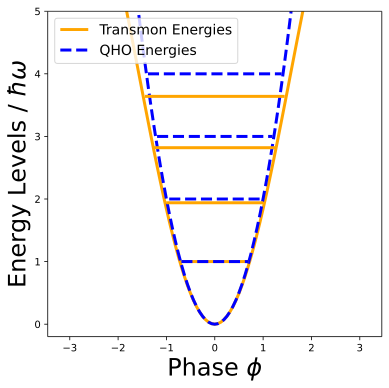

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

axes.plot(phis, U_transmon, '-', color='orange', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='blue', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)
    
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,5)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)


## 6. 量子ビットのドライブと回転波近似 <a id='qdatrwa'></a>

ここでは、簡単のためにトランズモンを量子ビットとして扱いますが、これは定義上、レベルが2つしかないことを意味します。したがって、トランズモンのハミルトニアンは次のようになります。

$$
\hat{H}_0 = \sum_{j=0}^1 \hbar \omega_j |j\rangle \langle j| \equiv 0 |0\rangle \langle 0| + \hbar\omega_q |1\rangle \langle 1|.
$$

ダイナミクスに影響を与えずにハミルトニアンから一定のエネルギーを加算または減算できるため、量子ビット周波数の半分を減算することにより、 $|0\rangle$ および $|1\rangle$ の状態エネルギーを $E=0$ について対称にします。

$$
\hat{H}_0 = - (1/2)\hbar\omega_q |0\rangle \langle 0| + (1/2)\hbar \omega_q |1\rangle \langle 1| = 
-\frac{1}{2} \hbar \omega_q \sigma^z \qquad {\rm ここで} \qquad
\sigma^z = \begin{pmatrix}
1 & 0 \\
0 & -1 \end{pmatrix}
$$

はパウリのZ行列です。次に、電場 $\vec{E}(t) = \vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}$ でトランズモンをドライブすることによって、トランズモンとマイクロ波間で双極子相互作用をおこします。ハミルトニアンは量子ビットハミルトニアン $\hat{H}_0$ とドライブハミルトニアン $\hat{H}_d$ の和とします。

$$
\hat{H} = \hat{H}_0 + \hat{H}_d.
$$

トランズモンを量子ビットとして扱うことで、パウリ昇降演算子 $\sigma^\pm = (1/2)(\sigma^x \mp i\sigma^y)$ は $\sigma^+ |0\rangle = |1\rangle$ と $\sigma^+ |1\rangle = |0\rangle$ となる効果があります。（この定義は *スピン* の代わりに *量子ビット* の昇降演算子を使っていることに注意。[セクション 1](#mlqsaq) の議論により、$|0\rangle \equiv |\uparrow\rangle$ と $|1\rangle \equiv |\downarrow \rangle$ のため、昇降演算子は逆になっている）さて、電場が量子ビットを励起、脱励起するため、双極子演算子を $\vec{d} = \vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-$ と定義します。双極子相互作用のドライブハミルトニアンは、

$$
\hat{H}_d = -\vec{d} \cdot \vec{E}(t) = -\left(\vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-\right) \cdot \left(\vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}\right) \\
= -\left(\vec{d}_0 \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0 \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^+
-\left(\vec{d}_0^* \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0^* \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^-\\
\equiv -\hbar\left(\Omega e^{-i\omega_d t} + \tilde{\Omega} e^{i\omega_d t}\right)\sigma^+
-\hbar\left(\tilde{\Omega}^* e^{-i\omega_d t} + \Omega^* e^{i\omega_d t}\right)\sigma^-
$$

ここで電場と双極子の強さを記述するため、  $\Omega = \vec{d}_0 \cdot \vec{E}_0$  と  $\tilde{\Omega} = \vec{d}_0 \cdot \vec{E}_0^* $  の置き換えを行いました。次に相互作用描像  $\hat{H}_{d,I} = U\hat{H}_dU^\dagger$ （簡単のため、キャンセルする項を省略）に移行します。ここで、

$$
U = e^{i\hat{H}_0t/\hbar} = e^{-i\omega_q t \sigma^z/2} = I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)
$$

これは、次のことに注意して計算できます。

$$
\sigma^\pm \sigma^z = (1/2) \left(\sigma^x \sigma^z \mp i \sigma^y \sigma^z\right) = (1/2)(-i\sigma^y \pm \sigma^x) = \pm\sigma^\pm = -\sigma^z \sigma^\pm.
$$

よって、

$$U\sigma^\pm U^\dagger = \left(I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)\right) \sigma^\pm \left(I\cos(\omega_q t/2) + i\sigma^z\sin(\omega_q t/2)\right) \\
= \sigma^\pm \left( \cos(\omega_q t/2) \pm i\sin(\omega_q t/2)\right) \left(\cos(\omega_q t/2) \pm i\sin(\omega_q t/2) \right) \\
= \sigma^\pm \left( \cos^2(\omega_q t/2) \pm 2i\cos(\omega_q t/2)\sin(\omega_q t/2) - \sin^2(\omega_q t/2)\right) \\
= \sigma^\pm \left( \cos(\omega_q t) \pm i\sin(\omega_q t) \right) = e^{\pm i\omega_q t} \sigma^{\pm},$$

ここで、三角関数の倍角の公式を使用しました。 変換されたハミルトニアンは、

$$
\hat{H}_{d,I} = U\hat{H}_dU^\dagger = -\hbar\left(\Omega e^{-i\omega_d t} + \tilde{\Omega} e^{i\omega_d t}\right)e^{i\omega_q t} \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i\omega_d t} + \Omega^* e^{i\omega_d t}\right)e^{-i\omega_q t} \sigma^-\\
= -\hbar\left(\Omega e^{i\Delta_q t} + \tilde{\Omega} e^{i(\omega_q+\omega_d) t}\right) \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i(\omega_q+\omega_d) t} + \Omega^* e^{-i\Delta_q t}\right) \sigma^-
$$

さてここで、回転波近似(Rotating Wave Approximation:RWA)を行います。$\omega_q+\omega_d$ が $\Delta_q = \omega_q-\omega_d$ よりもずっと大きいため、指数関数の和になっている項は非常に早く振動し、事実上寄与は平均化できるので、それらの項をハミルトニアンから落とします。そして RWA 相互作用ハミルトニアンは次のようになります。
$$
\hat{H}_{d,I}^{\rm (RWA)} =-\hbar\Omega e^{-i\Delta_q t}  \sigma^+ -\hbar \Omega^* e^{i\Delta_q t} \sigma^-
$$
シュレーディンガー描像に戻り
$$
\hat{H}_{d}^{\rm (RWA)} = U^\dagger \hat{H}_{d,I}^{\rm (RWA)} U = -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^-
$$
量子ビットとドライブハミルトニアンの合計は次のようになります
$$
\hat{H}^{\rm (RWA)} = -\frac{1}{2} \hbar\omega_q \sigma^z -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^-.
$$

$U_d = \exp\{-i\omega_d t\sigma^z/2\}$ の変換によって、ドライブのフレームに移行するとハミルトニアンは次のようになります。
$$
\hat{H}_{\rm eff} = U_d \hat{H}^{\rm (RWA)} U_d^\dagger - i\hbar U_d \dot{U}_d^\dagger
$$
ここで $\dot{U}_d = dU_d/dt$ は $U_d$ の時間微分です。そのため RWA でのドライブフレームは、
$$
\hat{H}_{\rm eff} = -\frac{1}{2} \hbar\omega_q \sigma^z -\hbar\Omega \sigma^+ -\hbar\Omega^* \sigma^- + \frac{1}{2} \hbar\omega_d \sigma^z = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^+ -\hbar\Omega^* \sigma^-
$$
ドライブは実数と仮定すると $\Omega = \Omega^*$ であり、シンプルにすると以下になります。
$$
\hat{H}_{\rm eff} = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^x.
$$
これはドライブが量子ビットに共鳴するとき（すなわち $\Delta_q = 0$）、ドライブは大きさ $\Omega$ で $\sigma^x$ の項によってブロッホ球上の $x$ 回転を起こします。この共鳴の効果についてはセクション [スペクトロスコピーによる量子ビットの共振周波数測定](/course/quantum-hardware-pulses/calibrating-qubits-using-qiskit-pulse) を見てください。
共鳴から外れたドライブは、$\sigma^z$ の効果により追加の $z$ 回転を持ちます。これらの振動は [ラムゼー実験](/course/quantum-hardware-pulses/calibrating-qubits-using-qiskit-pulse) を見てください。